In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('vietdata.csv', skiprows=4)

In [108]:
indicators = [ 'Population, total', 'GDP per capita (constant 2010 US$)', 'GDP (constant 2010 US$)']

In [109]:
data = df.loc[df['Indicator Name'].isin(indicators), '2008':'2017']
data.index = indicators
data

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
"Population, total",8.670780e+07,8.756541e+07,8.847251e+07,8.943664e+07,9.045188e+07,9.149772e+07,9.254492e+07,9.357157e+07,9.456907e+07,9.554080e+07
GDP per capita (constant 2010 US$),1.191999e+03,1.244037e+03,1.310370e+03,1.377134e+03,1.433129e+03,1.493563e+03,1.565020e+03,1.651235e+03,1.735291e+03,1.834652e+03
GDP (constant 2010 US$),1.033556e+11,1.089346e+11,1.159317e+11,1.231662e+11,1.296292e+11,1.366576e+11,1.448347e+11,1.545086e+11,1.641049e+11,1.752841e+11


In [165]:
data['2017'].astype(str)

Population, total                             95540800.0
GDP per capita (constant 2010 US$)    1834.6515947236899
GDP (constant 2010 US$)                 175284081081.177
Name: 2017, dtype: object

In [110]:
ratio =  pd.DataFrame(data.values / data.iloc[:, [0]].values, index=data.index, columns=data.columns)
ratio

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
"Population, total",1.0,1.009891,1.020352,1.031472,1.043180,1.055242,1.067319,1.079160,1.090664,1.101871
GDP per capita (constant 2010 US$),1.0,1.043656,1.099305,1.155315,1.202291,1.252990,1.312938,1.385265,1.455783,1.539139
GDP (constant 2010 US$),1.0,1.053979,1.121679,1.191675,1.254206,1.322208,1.401324,1.494923,1.587770,1.695932


In [154]:
gdp_ratio_2017 = ratio.loc['GDP (constant 2010 US$)', '2017']
pop_ratio2017 = ratio.loc['Population, total', '2017']
capita_ratio2017 = ratio.loc['GDP per capita (constant 2010 US$)', '2017']

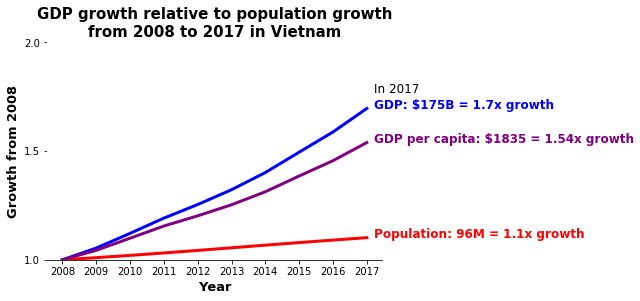

In [240]:
fig, ax = plt.subplots()
ax.plot(ratio.iloc[2], label='GDP', lw=3, color='b')
ax.plot(ratio.iloc[0], label='Population', lw=3, color='r')
ax.plot(ratio.iloc[1], label='GDP per capita', lw=3, color='purple')
ax.text(9.2, gdp_ratio_2017, f'GDP: $175B = {round(gdp_ratio_2017, 2)}x growth', transform=ax.transData, color='blue', size=12, weight='bold')
ax.text(9.2, pop_ratio2017, f'Population: 96M = {round(pop_ratio2017, 2)}x growth', transform=ax.transData, color='red', size=12, weight='bold')
ax.text(9.2, capita_ratio2017, f'GDP per capita: $1835 = {round(capita_ratio2017, 2)}x growth', transform=ax.transData, color='purple', size=12, weight='bold')
ax.text(9.2, gdp_ratio_2017 + 0.07, 'In 2017', transform=ax.transData, color='black', size=12)
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['top'].set_color('white')
ax.set_ylim([1, 2])
ax.set_yticks([1, 1.5, 2])
ax.set_xlabel('Year', size=13, weight='bold')
ax.set_ylabel('Growth from 2008', size=13, weight='bold')
ax.set_title('GDP growth relative to population growth\nfrom 2008 to 2017 in Vietnam', size=15, weight='bold')
plt.show()